# Bone Tumor Recurrence Predictions

Bone cancer is among the most significant and hazardous causes of early death worldwide [4]. The chance of survivability of the patients with bone tumors is an crucial element in identifying the treatment to be applied to the patient and treatment management. Thus, by creating a method that predicts the survivability status of the patients, treatment planning could be made more accurately and the survivability chance of the patients could greatly increase. This study seeks to establish an artificial intelligence(AI) model utilizing artificial neural networks(ANN) to identify recovery, alive with the disease and death status of the patients who have undergone treatment for bone tumors of the leiomyosarcoma, synovial sarcoma and malignant fibrous histiocytoma types. The training of the model was conducted utilizing a dataset taken from the Kaggle platform [9]. The performance of the developed model was tested with the test dataset and 0.7303 accuracy was obtained for the prognosis of recovery, alive with the disease and death status of the patients.

## Importing Data

The training of the model was conducted utilizing a dataset taken from the Kaggle platform [3]. The data was collected from patients at the Memorial Sloan Kettering Cancer Center (MSKCC). The dataset includes the following information:

- **Patient ID: A unique identifier for each patient.**

- **Sex: The patient's sex.**

- **Age: The patient's age at the time of diagnosis.**

- **Grade: The grade of the tumor, which is a measure of how aggressive the tumor is.**

- **Histological type: The type of tumor, such as osteosarcoma or Ewing sarcoma.**

- **MSKCC type: The MSKCC type of the tumor, which is a more specific classification of the tumor.**

- **Site of primary STS: The location of the tumor in the bone.**

- **Status (NED, AWD, D): The patient's status, which can be NED (no evidence of disease), AWD (alive with disease), or D (dead).**

- **Treatment: The treatment that the patient received, such as surgery, radiation therapy, or chemotherapy.**

In [1]:
import numpy as np
import pandas as pd 

data = pd.read_csv("Bone Tumor Dataset.csv")

data.head()

,Patient ID,Sex,Age,Grade,Histological type,MSKCC type,Site of primary STS,"Status (NED, AWD, D)",Treatment
0,STS_001,Female,63,High,pleiomorphic leiomyosarcoma,Leiomyosarcoma,parascapusular,NED,Radiotherapy + Surgery
1,STS_002,Female,54,Intermediate,pleiomorphic leiomyosarcoma,MFH,left thigh,D,Surgery + Chemotherapy
2,STS_003,Male,22,Intermediate,synovial sarcoma,MFH,right buttock,D,Radiotherapy + Surgery
3,STS_004,Female,54,Intermediate,synovial sarcoma,Leiomyosarcoma,right thigh,NED,Radiotherapy + Surgery
4,STS_005,Male,63,High,pleiomorphic spindle cell undifferentiated,MFH,right parascapusular,AWD,Radiotherapy + Surgery + Chemotherapy


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient ID            500 non-null    object
 1   Sex                   500 non-null    object
 2   Age                   500 non-null    int64 
 3   Grade                 500 non-null    object
 4   Histological type     500 non-null    object
 5   MSKCC type            500 non-null    object
 6   Site of primary STS   500 non-null    object
 7   Status (NED, AWD, D)  500 non-null    object
 8   Treatment             500 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


## Feature Preprocessing Steps

### - Preparing the Features and Label

In [3]:
X = data.drop(["Patient ID", "Status (NED, AWD, D)"], axis=1)
y = data["Status (NED, AWD, D)"]

In [4]:
y.value_counts()

Status (NED, AWD, D)
NED    247
D      141
AWD    112
Name: count, dtype: int64

### - Splitting The Data As Train And Test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1773, stratify=y)

### - Preparing Encoder And Scaler Objects

In [6]:
from sklearn import set_config
set_config(transform_output="pandas")

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

nominal_features = ["Sex", "Histological type", "MSKCC type", "Site of primary STS", "Treatment"]

nominal_transformer = OneHotEncoder(drop='first', sparse_output=False)

In [7]:
ordinal_features = ["Grade"]  
freq_cat = [["Intermediate", "High"]]

ordinal_transformer = OrdinalEncoder(categories = freq_cat)

In [8]:
numeric_features = ["Age"]

numeric_transformer = StandardScaler()

In [9]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[("nominal", nominal_transformer, nominal_features),
                                               ("ordinal", ordinal_transformer, ordinal_features),
                                               ("numeric", numeric_transformer, numeric_features)])
preprocessor

ColumnTransformer(transformers=[('nominal',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Sex', 'Histological type', 'MSKCC type',
                                  'Site of primary STS', 'Treatment']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['Intermediate',
                                                             'High']]),
                                 ['Grade']),
                                ('numeric', StandardScaler(), ['Age'])])

### - Transform the Data by Applying the Prepared Encoder and Scaler

In [10]:
transformed_X_train = preprocessor.fit_transform(X_train)
transformed_X_train

,nominal__Sex_Male,nominal__Histological type_leiomyosarcoma,nominal__Histological type_malignant solitary fibrous tumor,nominal__Histological type_myxofibrosarcoma,nominal__Histological type_myxoid fibrosarcoma,nominal__Histological type_pleiomorphic leiomyosarcoma,nominal__Histological type_pleiomorphic spindle cell undifferentiated,nominal__Histological type_pleomorphic sarcoma,nominal__Histological type_poorly differentiated synovial sarcoma,nominal__Histological type_sclerosing epithelioid fibrosarcoma,...,nominal__Site of primary STS_left buttock,nominal__Site of primary STS_left thigh,nominal__Site of primary STS_parascapusular,nominal__Site of primary STS_right buttock,nominal__Site of primary STS_right parascapusular,nominal__Site of primary STS_right thigh,nominal__Treatment_Radiotherapy + Surgery + Chemotherapy,nominal__Treatment_Surgery + Chemotherapy,ordinal__Grade,numeric__Age
92,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.636679
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.094641
163,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.880452
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.331962
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.399358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.697622
418,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.550829
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.453849
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.374452


In [11]:
transformed_X_test = preprocessor.transform(X_test)
transformed_X_test

,nominal__Sex_Male,nominal__Histological type_leiomyosarcoma,nominal__Histological type_malignant solitary fibrous tumor,nominal__Histological type_myxofibrosarcoma,nominal__Histological type_myxoid fibrosarcoma,nominal__Histological type_pleiomorphic leiomyosarcoma,nominal__Histological type_pleiomorphic spindle cell undifferentiated,nominal__Histological type_pleomorphic sarcoma,nominal__Histological type_poorly differentiated synovial sarcoma,nominal__Histological type_sclerosing epithelioid fibrosarcoma,...,nominal__Site of primary STS_left buttock,nominal__Site of primary STS_left thigh,nominal__Site of primary STS_parascapusular,nominal__Site of primary STS_right buttock,nominal__Site of primary STS_right parascapusular,nominal__Site of primary STS_right thigh,nominal__Treatment_Radiotherapy + Surgery + Chemotherapy,nominal__Treatment_Surgery + Chemotherapy,ordinal__Grade,numeric__Age
297,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.880452
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.149132
318,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.271019
361,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088189
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.697622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.704075
239,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.636679
300,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.246112
209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.582188


### - Encode the Labels

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

print(y_train.shape)
print(y_test.shape)

(425,)
(75,)


In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print(y_train.shape)
print(y_test.shape)

(425, 3)
(75, 3)


## Preparing the Artificial Neural Network Model

ANN were used to develop a method to predict survivability status of the patients. ANN models include various hyperparameters such as number of layers, number of neurons, activation function, optimizer, number of epochs and batch size. Model performance varies greatly depending on the selection of these parameters. Since these hyperparameter combinations are quite numerous, it is not possible to try them one by one. With the help of the RandomSearch function in the keras_tuner library, any number of models can be created by randomly selecting from these hyperparameter combinations. Moreover, the executions_per_trial parameter allows you to specify how many times the model will be trained and validated for each hyperparameter combination. This setting ensures more consistent results for each model. For example, if executions_per_trial is set to 5, the model is trained 3 times for each hyperparameter combination and the validation results are averaged. This is especially useful if there are fluctuations in the training data.  The model was created with 8 neurons in the input layer, 16, 32, 64, 128 and 256 neurons in the hidden layers, respectively. As the model gets deeper, increasing the number of neurons exponentially makes it possible to learn more complex relationships. Leaky relu function was chosen as the activation function for these layers. To prevent over-fitting, Dropout layers were added after these hidden layers at rates of 20%. In a neural network, dropping out units are referred to as dropout [8]. When a unit is dropped out of the network, all of its input and output connections are also temporarily removed [8]. The units that are dropped are chosen randomly [8]. 

## Predict the Labels From the Model

In [14]:
import os

directory = "bone_predict1"
if not os.path.exists(directory):
    os.makedirs(directory)

In [15]:
cd

C:\Users\doguk


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import set_random_seed
from keras_tuner.tuners import RandomSearch

np.random.seed(1773)
set_random_seed(9)

def build_model(hp):
    
    model = Sequential()

    model.add(Dense(8, activation='leaky_relu'))
    model.add(Dropout(0.20))

    model.add(Dense(32, activation='leaky_relu'))
    model.add(Dropout(0.20))

    model.add(Dense(64, activation='leaky_relu'))
    model.add(Dropout(0.20))
    
    model.add(Dense(128, activation = "leaky_relu")) 
    model.add(Dropout(0.20))
    
    model.add(Dense(256, activation = "leaky_relu")) 
    model.add(Dropout(0.20))
    
    model.add(Dense(3, activation='softmax'))
              
    model.compile(optimizer=Adam(learning_rate = hp.Float('learning_rate', min_value=0.001, max_value=0.1, step=0.001)), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=100, executions_per_trial=3, directory="my_dir_bone", project_name='intro_to_kt_4')

Reloading Tuner from my_dir_bone\intro_to_kt_4\tuner0.json


In [17]:
tuner.search(transformed_X_train,
             y_train, 
             validation_split=0.15, 
             epochs=tuner.oracle.hyperparameters.Int('epochs', min_value=50, max_value=150, step=10),
             batch_size = tuner.oracle.hyperparameters.Choice('batch_size', values=[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]))

In [18]:
best_hps = tuner.get_best_hyperparameters()[0]

print("Best Hyperparameters:")
for hp_name in best_hps.values:
    print(f"{hp_name}: {best_hps.get(hp_name)}")

Best Hyperparameters:
learning_rate: 0.008
epochs: 120
batch_size: 35


In [19]:
np.random.seed(1773)
set_random_seed(9)

model = Sequential()

model.add(Dense(8, activation='leaky_relu'))
model.add(Dropout(0.20))

model.add(Dense(16, activation='leaky_relu'))
model.add(Dropout(0.20))

model.add(Dense(32, activation='leaky_relu'))
model.add(Dropout(0.20))

model.add(Dense(64, activation='leaky_relu'))
model.add(Dropout(0.20))
    
model.add(Dense(128, activation = "leaky_relu")) 
model.add(Dropout(0.20))

model.add(Dense(256, activation = "leaky_relu")) 
model.add(Dropout(0.20))


model.add(Dense(3, activation='softmax'))

adam0 = Adam(learning_rate=best_hps.get('learning_rate'))
model.compile(loss='categorical_crossentropy', optimizer=adam0, metrics=['accuracy', 'precision', 'recall'])

history_model = model.fit(transformed_X_train, y_train, validation_split=0.15, epochs=best_hps.get('epochs'), batch_size=best_hps.get('batch_size'), verbose=0)

## Evaluate the Model Performance 

In [20]:
label_ann_train = model.predict(transformed_X_train)

label_ann_test = model.predict(transformed_X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
from sklearn.metrics import accuracy_score

# Since y_train is encoded, each label needs to be converted to class index with argmax.
y_train_classes = np.argmax(y_train, axis=1)

label_ann_train_classes = np.argmax(label_ann_train, axis=1)

train_error = label_ann_train_classes - y_train_classes

accuracy_train = accuracy_score(y_train_classes, label_ann_train_classes)
print("Accuracy: %.4f" % accuracy_train)

Accuracy: 0.7694


In [22]:
y_test_classes = np.argmax(y_test, axis=1)

label_ann_test_classes = np.argmax(label_ann_test, axis=1)

test_error = label_ann_test_classes - y_test_classes

accuracy_test = accuracy_score(y_test_classes, label_ann_test_classes)
print("Accuracy: %.4f" % accuracy_test)

Accuracy: 0.7333


In [23]:
result_train = model.evaluate(transformed_X_train, y_train)
result_test = model.evaluate(transformed_X_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7715 - loss: 0.6373 - precision: 0.8032 - recall: 0.7555
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7534 - loss: 0.8862 - precision: 0.7614 - recall: 0.7060


In [24]:
print(f"Train Accuracy: {result_train[1]:.4f}\nTrain Precision: {result_train[2]:.4f}\nTrain Recall: {result_train[3]:.4f}")

Train Accuracy: 0.7694
Train Precision: 0.7951
Train Recall: 0.7576


In [25]:
print(f"Test Accuracy: {result_test[1]:.4f}\nTest Precision: {result_test[2]:.4f}\nTest Recall: {result_test[3]:.4f}")

Test Accuracy: 0.7333
Test Precision: 0.7429
Test Recall: 0.6933


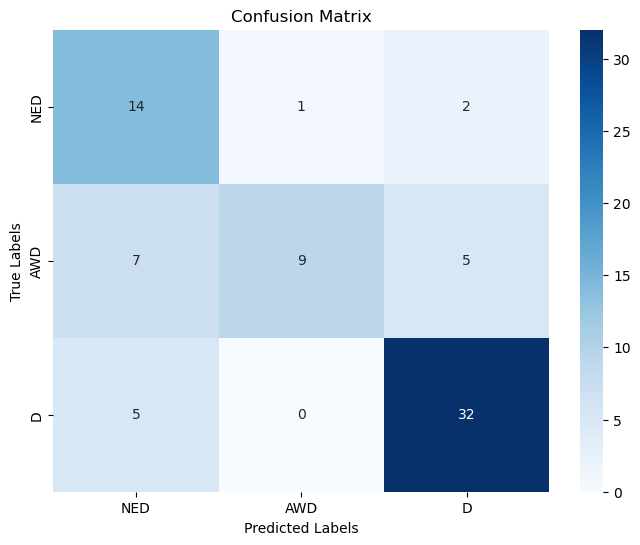

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_classes, label_ann_test_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["NED", "AWD", "D"], yticklabels=["NED", "AWD", "D"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# T-Test for Bone Tumor Survivability Prediction

Determining the performance of the model is a critical parameter in terms of analyzing the reliability of the predictions to be made. The t-test is used to determine whether the model was overfitted/underfitted or not [2]. As a type of statistical test, the t-test is utilized to compare with the two groups means [5]. The Student's t-test and the Welch's t-test are the two variants of the t-test used to compare means from unpaired data [7]. The variances (or standard deviations) of the two groups/samples must be equal for the original Student's t-test to work [10]. In practice, if the standard deviations are comparable, the test will be powerful [10]. But there's a better method: the Welch t-test [10]. This has nearly as much power as the Student's t-test and permits different standard deviations [10]. Welch's t-test uses the formula as in Equation (2) to define the statistic.

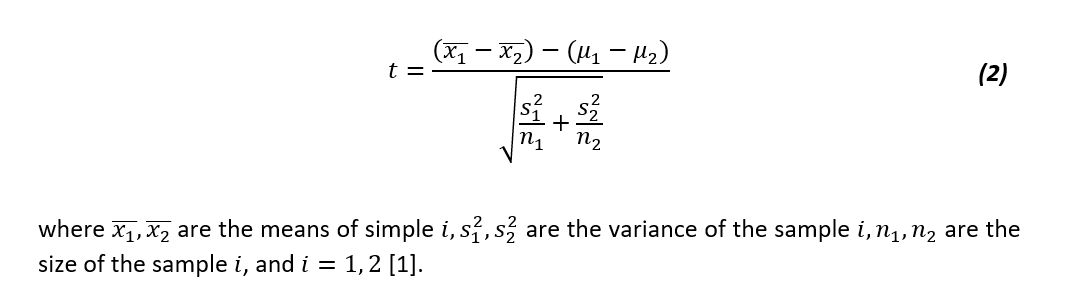

From the sample data, the Welch-Satterthwaite equation is used to approximate the degrees of freedom as in Equation (3) associated with this variance estimate.

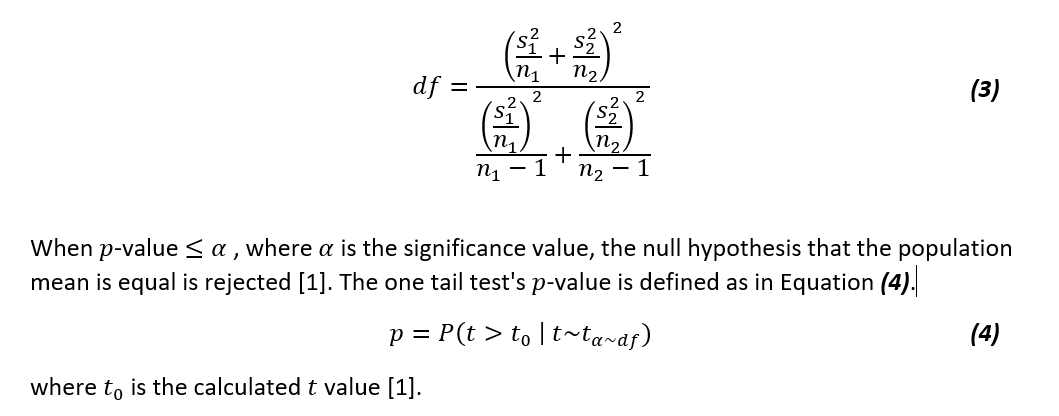

A statistical test's power is the likelihood that a null hypothesis (H0) will be rejected if it is false; in other words, the likelihood that a statistically significant result will be obtained or that the test will conclude that the phenomenon exists [1]. The p-value was chosen as 0.05, which is used as the traditional approach [6].

In [27]:
print(np.var(train_error))
print(np.var(test_error))

0.38269342560553626
0.5379555555555555


The variances (or standard deviations) of the train and test sets are not equal. Therefore, the Welch t-test must be used.

In [28]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(train_error, test_error, equal_var=False) #equal_var = False is used for Welch's t-test.

alpha = 0.05

if p_value < alpha:
    print(f"The null hypothesis (𝐻0) is rejected. The mean difference between the train and test sets is statistically significant (p = {p_value:.4f}).")
    print("This indicates that the model is overfitted/underfitted.")
else:
    print(f"The null hypothesis (𝐻0) cannot be rejected. The mean difference between the train and test sets is not statistically significant (p = {p_value:.4f}).")
    print("This indicates that the model is not overfitted/underfitted.")

The null hypothesis (𝐻0) cannot be rejected. The mean difference between the train and test sets is not statistically significant (p = 0.1009).
This indicates that the model is not overfitted/underfitted.


In [29]:
import session_info

session_info.show(excludes=["pybind11_abseil"])

# Conclusion

The chance of survivability of the patients with bone tumors is an important element for planning the treatment management. It is a crucial parameter in determining the treatment to be applied to the patient and planning the process. Therefore, it may be ensured that constructing a model that can predict the patients survivability status provides the most appropriate treatments are applied to the patients and perhaps save their life. For this purpose, ANN were used to build a method to predict recovery, alive with the disease and death status of the patients who have undergone treatment for bone tumors of the leiomyosarcoma, synovial sarcoma and malignant fibrous histiocytoma types. The performance of the constructed model was tested with the test dataset and 0.7303 accuracy was obtained for the prognosis of the survivability status of the patients. The p-value of the consturected model was calculated as 0.1009. Since the p-value is greater than 0.05, the null hypothesis (H0) cannot be rejected. That is, that the mean difference between the train and test sets is not statistically significant. This indicates that the model is not overfitted/underfitted.

The prediction accuracy obtained by using the ANN model will allow for more personalized and effective treatment plans by quickly predicting the survivability or recovery status of the patients. In this way, life expectancy and quality of the patients could be increased. In addition, rapid diagnosis will allow the state to significantly reduce the budget it needs to allocate to the health sector. The development of this AI-based model will contribute greatly to the planning of treatment methods for complex diseases, and thanks to the modeling study, it is possible to get rid of the financial burden of surgical studies. This study will increase the innovative and functional use of artificial intelligence in the health field and guide similar studies in the future. This study will also enable disease prediction models in the health sector, and the results obtained will allow the observation of the potential of artificial intelligence in the medical field. This study aimed to make a significant contribution to the intersection of medicine and technology by pioneering the new and innovative use of artificial intelligence in the medical field.

# References

[1] Ahad, N. A., & Yahaya, S. S. S. (2014, July). Sensitivity analysis of Welch’st-test. In AIP Conference proceedings (Vol. 1605, No. 1, pp. 888-893). American Institute of Physics.

[2] Alkhatib, G. (2024). Exploring Machine Learning Hypothesis Testing. International Journal of Computers, 9.

[3] Foersch, S., Eckstein, M., Wagner, D. C., Gach, F., Woerl, A. C., Geiger, J., ... & Roth, W. (2021). Deep learning for diagnosis and survival prediction in soft tissue sarcoma. Annals of Oncology, 32(9), 1178-1187.

[4] Hossain, E., & Rahaman, M. A. (2018, September). Bone cancer detection & classification using fuzzy clustering & neuro fuzzy classifier. In 2018 4th International Conference on Electrical Engineering and Information & Communication Technology (iCEEiCT) (pp. 541-546). IEEE.

[5] Kim, T. K. (2015). T test as a parametric statistic. Korean journal of anesthesiology, 68(6), 540-546.

[6] Preston, I. L. (1967). Choosing the level of significance in communication research. The Public Opinion Quarterly, 31(1), 80-86.

[7] Sakai, T. (2016, July). Two sample t-tests for ir evaluation: Student or welch?. In Proceedings of the 39th International ACM SIGIR conference on Research and Development in Information Retrieval (pp. 1045-1048). 

[8] Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: a simple way to prevent neural networks from overfitting. The journal of machine learning research, 15(1), 1929-1958.

[9] The bone tumor dataset. https://www.kaggle.com/datasets/antimoni/bone-tumor/data

[10] West, R. M. (2021). Best practice in statistics: Use the Welch t-test when testing the difference between two groups. Annals of clinical biochemistry, 58(4), 267-269. 